<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/EjerciciosRegularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 4.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=13b5b88e510638dbee78d53fd2eb5898dbf1cccc7431e32033b777d25624b224
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

%matplotlib inline
import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                           summarize,
                           poly)
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler

from functools import partial


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from ISLP.models import (Stepwise, sklearn_selected, sklearn_selection_path)

# Conceptual


## 1

(a) Which of the three models with k predictors has the smallest
training RSS?


cuando k < p entonces el menor sera el best subset, sin embargo cuando k ==p entonces los 3 llegaran al minimo

(b) Which of the three models with k predictors has the smallest
test RSS?

todo dependera de la forma en la que calculamos el test RSS sin embargo dado que el espacio de busqueda y dejando parametros de testeo iguales, el subset deberia de ser mejor.

c)
True
true
false
false
flase

## 2

(a) The lasso, relative to least squares, is:

i. More flexible and hence will give improved prediction ac-
curacy when its increase in bias is less than its decrease in
variance

False, dado que por flexibiklidad entendemos modelos con mayor varianza y menor bias. sin embargo en el caso de lasso son modelos con mayor bias y se trata de reducir la varianza.

ii. More flexible and hence will give improved prediction accu-
racy when its increase in variance is less than its decrease
in bias.

falso debido a que Lasso es un modelo de least squares sin embargo este tiene un lambda que sirve de parametro de flexibilizacion. el modelo least squares es un modelo insesgado asi que variaciones en el parametro de lasso no tendra una reduccion del bias menor que el hallado con least squares

iii. Less flexible and hence will give improved prediction accu-
racy when its increase in bias is less than its decrease in
variance

True, debido a que usamos parametros extra para el calculo de los coeficientes optimos. lo cual incrementa el bias del modelo haciendolo menos flexible. Esto se corresponde con una reduccion del variance.

iv. Less flexible and hence will give improved prediction accu-
racy when its increase in variance is less than its decrease
in bias.

False, la varianza no aumenta, si no que decrece.


En el **caso de Non-Linear Methods**

Tenemos que la flexibilidad aumenta esto debido a que el modelo deja de ser lineal lo cual significa que puede tomar la forma del training set, la cual puede ser una curva. Este metodo solo tiene sentido si es que la reduccion en el error es positiva, es decir, cuando la reduccion del error del bias es mayor que el incremento de la varianza del modelo.

En el **caso de Ridge**

Tenemos que la preposicion 3, es la correcta debido a que tambien es un modelo de shrinkage lo cual significa que los coefcientes no seran los mismos que el OLS, siendo de menor varianza pero a costo de mayor bias.

## 3

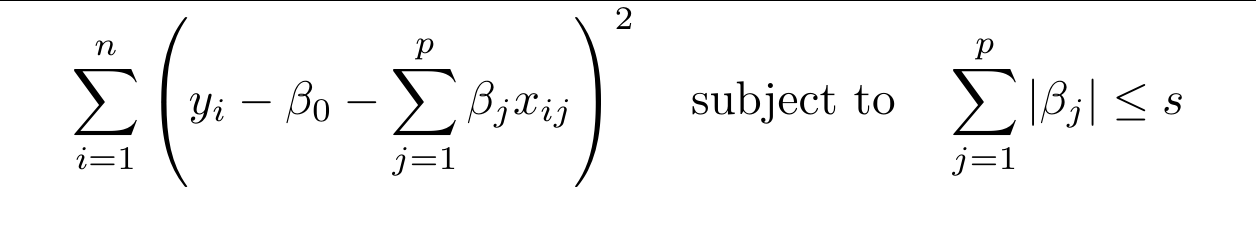

a) As we increase s from 0, the training RSS will:

i. Increase initially, and then eventually start decreasing in an
inverted U shape.

False, la curva se reducira mientras el valor de s incrementa y eventualmente se aplanra mientras mas grande sea s.

ii. Decrease initially, and then eventually start increasing in a
U shape.

Falso, dado que estamos con el training set el valor se ira reduciendo ya que con incrementos en los predictores el RSS training caera continuamente.

iii. Steadily increase.

False, la suma se ira progresivamente para 0

iv. Steadily decrease.

True

v. Remain constant.

False dado que mientras mas predictores haya en RSS training se ira reduciendo.




En el caso de **Test RSS**
Esto es dado que al inicio con el aporte de nuevos predictores se incrementara la varianza esto significa que hay overfitting.

EN el caso de la **Varianza**

Tenemos que constantemente estara incrementando dado que el modelo sera mas flexible.

En el caso de **Bias**

con s aumentando tenemos que el modelo sera mas flexible lo que significa que el bias se reducira dado que nos acercaremos mas al modelo definido, sin embargo tambien se incrementara la varianza.


## 4

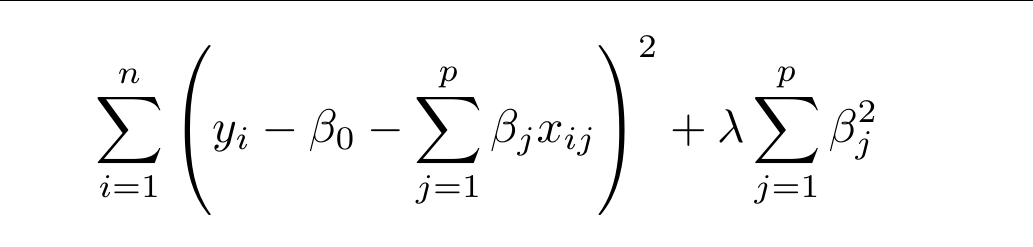

(a) As we increase λ from 0, the training RSS will:

i. Increase initially, and then eventually start decreasing in an
inverted U shape.

ii. Decrease initially, and then eventually start increasing in a
U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant.

a) El RSS training estara constantemente incrementandose iniciando en los valores de los coeficientes de OLS que minimizan RSS. y cuando lambda incremente el RSS training incrementara hasta llega al valor del null model.

b) En el caso del **RSS test** sera ii decrease intially y luego increase in a U shape cuando tenemos incrementos en lambda quiere decir que el modelo es menos flexible lo que lo hace menos propenso a cambios en data set que significa menor varianza. Sin embargo esto tambien nos aleja del modelo real de los datos que significa una reduccion del bias. Por lo tanto tendremos un decrecimiento del RSS hasta cierto punto de inflexion en donde comenzaremos a tener un crecimiento del RSS dado que el bias sera mucho mayor.

c) En el caso de la varianza mientras lambda aumenta, esta se ira reduciendo constantemente

d) squared bias aumnentara cada vez mas y mas de forma explosiva

e) el error se mantiene constante

## 6 ....

## 7

Cuando p = 1 entonces dado el contexto del ridge regression podemos decir que:

$$(y_1 - \beta_1)^2 + \lambda \beta_1^2$$

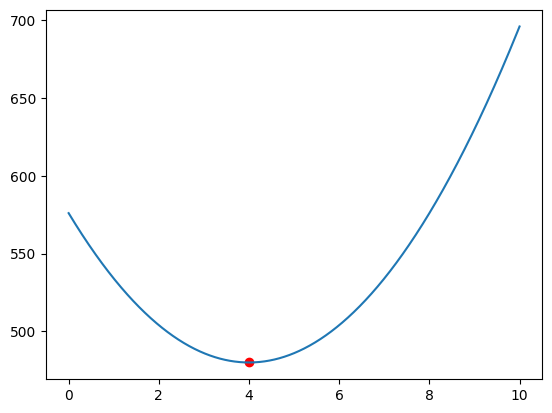

In [ ]:
# para algun valor de y1 y lambda tenemos que hacer un grafico en funcion
# de Beta
def f(y1, b1, lam):
  return (y1 - b1)**2 + lam* b1**2
b1 = np.linspace(0,10,1000)
y1 = 24
lam = 5
f_b1 = f(y1, b1, lam)
plt.plot(b1, f_b1)
plt.scatter(b1[np.argmin(f_b1)], np.min(f_b1), color="red")

np.float64(4.004004004004004)

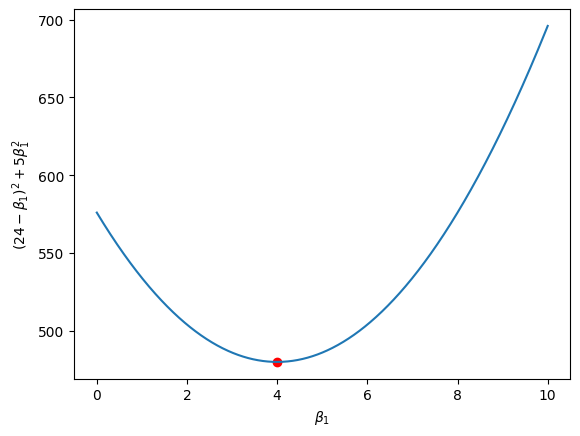

In [ ]:
def f(y1, lamda, beta1):
    return (y1 - beta1)**2 + lamda * beta1**2

lamda = 5
y1 = 24
beta1 = np.linspace(0, 10, 1000)
y_hat =  f(y1, lamda, beta1)

plt.plot(beta1, y_hat);
plt.xlabel('$\\beta_1$')
plt.ylabel(f'$({y1} - \\beta_1)^2 + {lamda} \\beta_1^2$')
plt.scatter(beta1[np.argmin(y_hat)], np.min(y_hat), color='r');
beta1[np.argmin(y_hat)]

veamos el caso de lasso


np.float64(23.873873873873876)

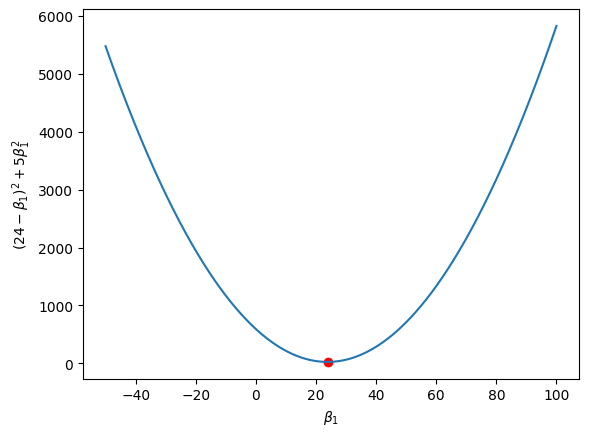

In [ ]:
def fl(y1, lamda, beta1):
    return (y1 - beta1) ** 2 + lamda * np.abs(b1)

lamda = 5
y1 = 24
beta1 = np.linspace(-50, 100, 1000)
y_hat =  fl(y1, lamda, beta1)

plt.plot(beta1, y_hat);
plt.xlabel('$\\beta_1$')
plt.ylabel(f'$({y1} - \\beta_1)^2 + {lamda} \\beta_1^2$')
plt.scatter(beta1[np.argmin(y_hat)], np.min(y_hat), color='r');
beta1[np.argmin(y_hat)]


# Applied

## 8

In [ ]:
# Vamos a simular data
#  media 0 desviacion estandar 1 y n = 100
# en el caso del ruido sera media 0 , desviacion 2 y size de 100

rng = np.random.default_rng(1)

x = rng.normal(size=100)
eps = rng.normal(size=100)

### b)


In [ ]:
# Generando la response

b0 = 50
b1 = 44
b2 = 97
b3 = 5

y = b0 + b1*x + b2*x**2 + b3*x**3 + eps

### c)


In [ ]:
# definiendo la funcion Cp
def nCp(sigma2, estimator, X, Y):
  n, p = X.shape
  Y_hat = estimator.predict(X)
  RSS = np.sum((Y - Y_hat)**2)
  Cp = -(RSS + 2*p*sigma2) / n
  return Cp
#

In [ ]:
# vamos a definir el modelo con x hasta x a la 10
df = pd.DataFrame({f"X^{i}": x ** i for i in range(1, 11)})
df["y"] = y
df.head()

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,0.004929,0.001703,0.000589,0.000203,0.000070,0.000024,76.345344
1,0.821618,0.675056,0.554639,0.455701,0.374412,0.307624,0.252749,0.207663,0.170620,0.140185,155.267304
2,0.330437,0.109189,0.036080,0.011922,0.003940,0.001302,0.000430,0.000142,0.000047,0.000016,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236,4.897573,-6.382308,8.317150,-10.838554,14.124341,146.992225
4,0.905356,0.819669,0.742092,0.671858,0.608270,0.550701,0.498580,0.451393,0.408671,0.369993,174.272880


In [ ]:
sigma2 = sm.OLS(y, df.drop("y", axis=1)).fit().scale
sigma2

np.float64(814.8803706928068)

In [ ]:
neg_cp = partial(nCp, sigma2)

In [ ]:
design = MS(df.columns.drop("y")).fit(df)
design.terms

Index(['X^1', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10'], dtype='object')

In [ ]:
X = design.transform(df).drop("intercept", axis=1)
X

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01
...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01


In [ ]:
strategy = Stepwise.first_peak(design,
                               direction="forward",
                               max_terms=len(design.terms))


In [ ]:
forward_model = sklearn_selected(sm.OLS,
                            strategy,
                            scoring=neg_cp)
forward_model.fit(df, y)
forward_model.selected_state_

('X^1', 'X^2', 'X^3')

In [ ]:
print(forward_model.results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.597e+05
Date:                Thu, 15 Jan 2026   Prob (F-statistic):          2.85e-194
Time:                        14:20:55   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     49.9428      0.120    416.437      0.0

### d) Veamos el caso con el backward

In [ ]:
strategy = Stepwise.first_peak(design,
                                direction="backwards",
                                max_terms=len(design.terms))
backward_model = sklearn_selected(sm.OLS,
                                  strategy,
                                  scoring=neg_cp)
backward_model.fit(df, y)
backward_model.selected_state_

('X^1', 'X^2', 'X^3')

En ambos casos tenemos los mismos valores de predictores

### e)


Ahora vamos a implementar un modelo de Lasso con los 10 predictores. Usando Cross Validation para seleccionar el valor optimo del hiperparametro.

In [ ]:
df = df.drop("y", axis=1)

In [ ]:
df

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05,76.345344
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01,155.267304
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01,146.992225
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01,174.272880
...,...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03,383.762385
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09,46.860329
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15,51.725924
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01,170.421323


In [ ]:
# Necesitamos scalar la data, definir un kfold y un pipeline
k = 5
kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=0)
scaler = StandardScaler(with_mean=True,
                        with_std=True)



In [ ]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[("scaler",scaler),
                         ("lasso", lassoCV)])
pipeCV.fit(df, y)
tunned_lasso = pipeCV.named_steps["lasso"]
print(tunned_lasso.alpha_)

0.1045257103559887


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.817e+02, tolerance: 1.093e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
tunned_lasso.coef_

array([11.38099194, 34.58194918,  4.10876622,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       72.91968513])

In [ ]:
df

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05,76.345344
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01,155.267304
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01,146.992225
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01,174.272880
...,...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03,383.762385
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09,46.860329
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15,51.725924
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01,170.421323


In [ ]:
soln_array.shape

(10, 100)

In [ ]:
lambdas, soln_array = skl.Lasso.path(df.drop("y", axis=1),
                                     y,
                                     l1_ratio=1,
                                     n_alphas=100)[:2]

sol_path = pd.DataFrame(soln_array.T,
                        columns=df.drop("y", axis=1).columns,
                        index=-np.log(lambdas))

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1017649129.py:4: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$-\log(\lambda)$",fontsize=29)


Text(0, 0.5, 'Standariced coefficients')

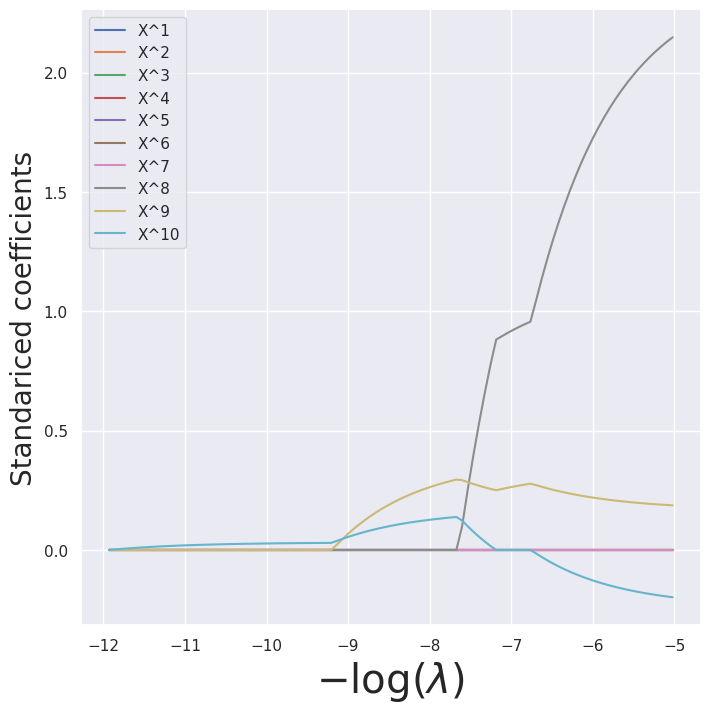

In [ ]:
path_fig, ax = plt.subplots(figsize=(8,8))
sol_path.plot(ax=ax, legend=False)
ax.legend(loc="upper left")
ax.set_xlabel("$-\log(\lambda)$",fontsize=29)
ax.set_ylabel("Standariced coefficients", fontsize=20)



Ahora veamos el grafico de los MSE


<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-3145876783.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


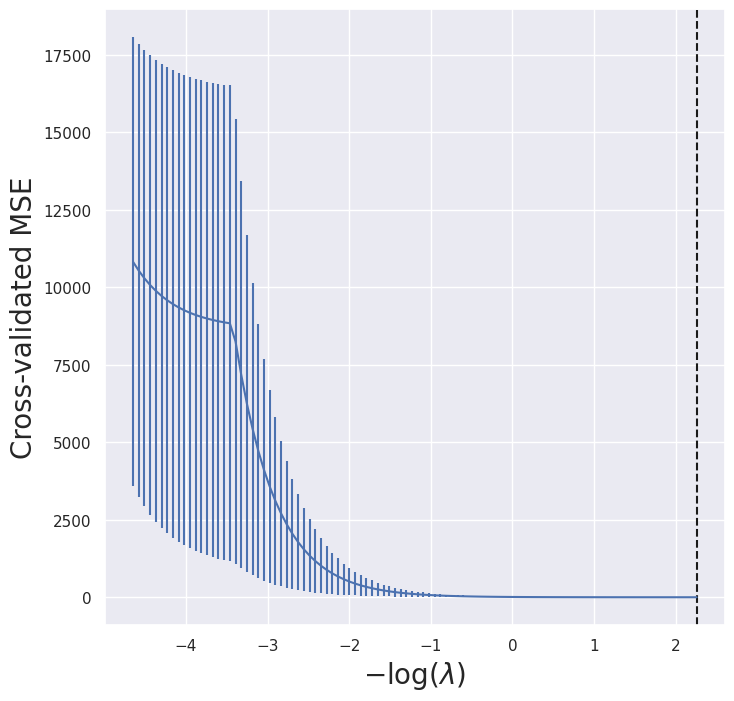

In [ ]:
lasso_CV_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(tunned_lasso.alphas_),
            tunned_lasso.mse_path_.mean(1),
            yerr=tunned_lasso.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(tunned_lasso.alpha_),
          ls="--",
          c="k")
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [ ]:
df

,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,4.929119e-03,1.703426e-03,5.886770e-04,2.034375e-04,7.030477e-05,2.429622e-05,76.345344
1,0.821618,0.675056,0.554639,0.455701,3.744123e-01,3.076239e-01,2.527494e-01,2.076635e-01,1.706201e-01,1.401846e-01,155.267304
2,0.330437,0.109189,0.036080,0.011922,3.939525e-03,1.301765e-03,4.301515e-04,1.421380e-04,4.696766e-05,1.551986e-05,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236e+00,4.897573e+00,-6.382308e+00,8.317150e+00,-1.083855e+01,1.412434e+01,146.992225
4,0.905356,0.819669,0.742092,0.671858,6.082703e-01,5.507011e-01,4.985804e-01,4.513927e-01,4.086711e-01,3.699927e-01,174.272880
...,...,...,...,...,...,...,...,...,...,...,...
95,-2.250854,5.066345,-11.403604,25.667851,-5.777459e+01,1.300422e+02,-2.927060e+02,6.588386e+02,-1.482950e+03,3.337904e+03,383.762385
96,-0.138655,0.019225,-0.002666,0.000370,-5.124869e-05,7.105904e-06,-9.852714e-07,1.366131e-07,-1.894214e-08,2.626428e-09,46.860329
97,0.033000,0.001089,0.000036,0.000001,3.913601e-08,1.291492e-09,4.261938e-11,1.406444e-12,4.641280e-14,1.531627e-15,51.725924
98,-1.425349,2.031620,-2.895767,4.127478,-5.883097e+00,8.385466e+00,-1.195222e+01,1.703608e+01,-2.428236e+01,3.461083e+01,170.421323


ahora veamos el caso con un outer validation set.

In [ ]:
outer_valid = skm.ShuffleSplit(n_splits=1,
                               test_size=0.25,
                               random_state=1)
k=5
inner_valid = skm.KFold(k,
                         shuffle=True,
                         random_state=2)
scaler = StandardScaler()
lasso_cv_valid = skl.ElasticNetCV(l1_ratio=1,
                                  cv=inner_valid)
pipe_lasso_v_cv = Pipeline(steps=[("scaler", scaler),
                                  ("lasso", lasso_cv_valid)])
results_lasso = skm.cross_validate(pipe_lasso_v_cv,
                                   df.drop("y", axis=1),
                                   y,
                                   cv=outer_valid,
                                   scoring="neg_mean_squared_error")
-results_lasso["test_score"]

array([0.95807935])

In [ ]:
pipe_lasso_v_cv.fit(df.drop("y", axis=1), y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
                              l1_ratio=1))])

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-4195913183.py:9: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated MSE')

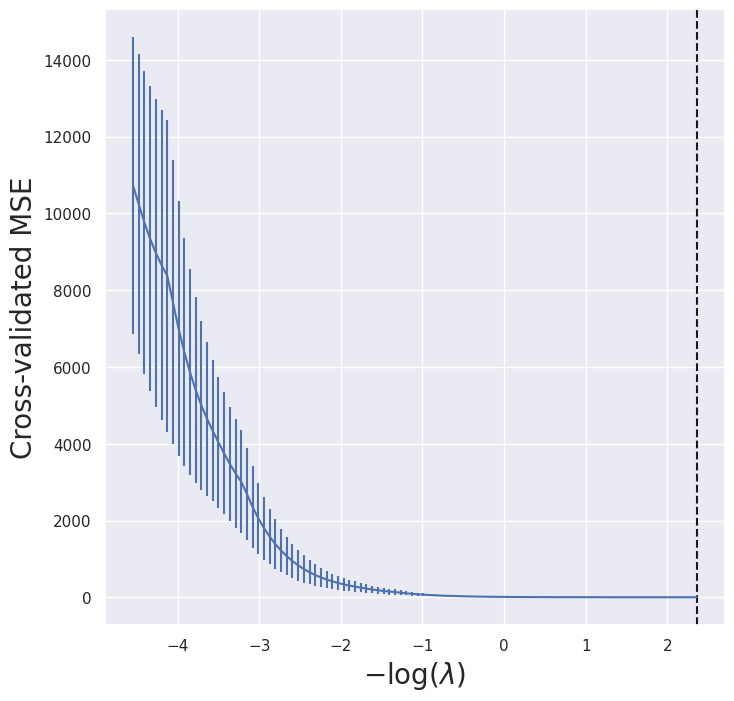

In [ ]:
tunned_lasso_cv = pipe_lasso_v_cv.named_steps["lasso"]
lambdas = tunned_lasso_cv.alphas_
lasso_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tunned_lasso_cv.mse_path_.mean(1),
            yerr=tunned_lasso_cv.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(tunned_lasso_cv.alpha_), c="k", ls="--")

ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)

In [ ]:
tunned_lasso_cv.coef_

array([ 3.73534163e+01,  1.14483615e+02,  1.43824335e+01,  0.00000000e+00,
        0.00000000e+00,  2.05614973e-01, -0.00000000e+00,  8.29412867e-02,
       -0.00000000e+00,  5.53145176e-02])

In [ ]:
# des scale
scaler = pipe_lasso_v_cv.named_steps["scaler"]
np.set_printoptions(suppress=True, precision=6)
tunned_lasso_cv.coef_ / scaler.scale_

array([43.864859, 96.639103,  4.976221,  0.      ,  0.      ,  0.00479 ,
       -0.      ,  0.000276, -0.      ,  0.000026])

### f)

In [ ]:
b0 = 23
b7 = 50

new_y = b0 + b7 * x  ** 7 + eps

Hallando mediante el uso de forward stepwise

In [ ]:
df = pd.DataFrame({f"X^{i}": x ** i for i in range(1, 11)})
df["y"] = new_y

df.head()


,X^1,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10,y
0,0.345584,0.119428,0.041273,0.014263,0.004929,0.001703,0.000589,0.000203,0.000070,0.000024,123.402249
1,0.821618,0.675056,0.554639,0.455701,0.374412,0.307624,0.252749,0.207663,0.170620,0.140185,136.010286
2,0.330437,0.109189,0.036080,0.011922,0.003940,0.001302,0.000430,0.000142,0.000047,0.000016,123.394323
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236,4.897573,-6.382308,8.317150,-10.838554,14.124341,-195.742563
4,0.905356,0.819669,0.742092,0.671858,0.608270,0.550701,0.498580,0.451393,0.408671,0.369993,148.301837


In [ ]:
design = MS(df.columns.drop("y")).fit(df)

strategy = Stepwise.first_peak(design,
                                direction="forward",
                                max_terms=len(design.terms))
forward_model = sklearn_selected(sm.OLS,
                                 strategy,
                                 scoring=neg_cp)
forward_model.fit(df, new_y)
forward_model.selected_state_

('X^7',)

ahora veamos el enfoque de the lasso

In [ ]:
scaler = StandardScaler()
k = 5

outer_val = skm.ShuffleSplit(n_splits=1,
                             test_size=0.25,
                             random_state=1)

inner_fold = skm.KFold(k,
                       shuffle=True,
                       random_state=2)

lasso = skl.ElasticNetCV(l1_ratio=1,
                       cv=inner_fold)

pipe = Pipeline(steps=[("scaler", scaler),
                      ("lasso", lasso)])

results = skm.cross_validate(pipe,
                             design.transform(df),
                             new_y,
                             cv=outer_valid,
                             scoring="r2")
print(results)

{'fit_time': array([0.305698]), 'score_time': array([0.00435]), 'test_score': array([0.999705])}


In [ ]:
pipe.fit(design.transform(df),
         new_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
                              l1_ratio=1))])

In [ ]:
pipe.fit(design.transform(df), new_y)
lasso_cv = pipe.named_steps["lasso"]
scaler = pipe.named_steps["scaler"]
lasso_cv.coef_ / scaler.scale_

array([  0.      , -27.857723,   0.      ,   0.      ,  -0.      ,
        52.206685,  -0.      ,  31.187236,  -0.      ,   1.600316,
        -0.      ])

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1361172925.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


Text(0, 0.5, 'Cross-validated MSE')

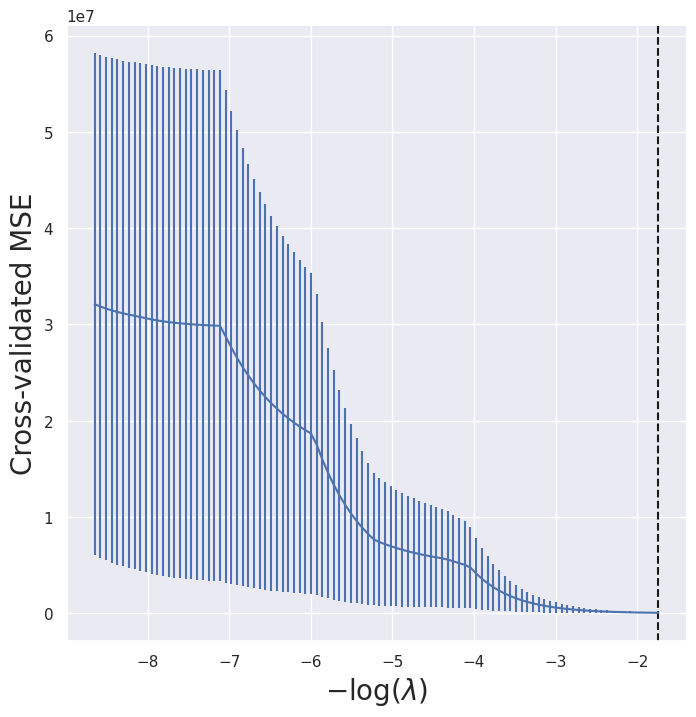

In [ ]:
tunned_lasso_cv = pipe.named_steps["lasso"]
lambdas = tunned_lasso_cv.alphas_
lasso_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tunned_lasso_cv.mse_path_.mean(1),
            yerr=tunned_lasso_cv.mse_path_.std(1) / np.sqrt(k))
ax.axvline(-np.log(tunned_lasso_cv.alpha_), c="k", ls="--")
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)


podemos decir que el enfoque forward stepwise hizo un trabajo mucho mejor al moemnto de seleccionar el modelo optimo. en el caso de lasso nos dio un modelo diferente que toma en cuentra otras variables no contempladas.

## 9

In [ ]:
df = load_data("College")

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    category
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null    int64   
dtypes: category(1), float64(1), in

### a

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
design = MS(df.columns.drop("Apps")).fit(df)

X = design.transform(df)
y = df["Apps"]

validation = skm.ShuffleSplit(n_splits=1,
                               test_size=0.25,
                               random_state=1)
k = 5
kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=1)
results = skm.cross_validate(LinearRegression(),
                             X,
                             y,
                             scoring="r2",
                             cv=kfold)
results["test_score"]


array([0.95499359, 0.94929543, 0.90050655, 0.88183176, 0.90433673])

In [ ]:
# Train test splits (validation set)
X_train, X_test, y_train, y_test = skm.train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
mse = np.mean(( y_test - y_hat) ** 2 )
print(f"MSE: {mse:.2f}\nR2: {model.score(X_test, y_test)}")



MSE: 642753.90
R2: 0.946013762835681


In [ ]:
X_train

,intercept,Private[Yes],Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
214,1.0,1.0,1908,678,24,57,2693,691,10970,4280,500,1380,47,51,13.3,18,7711,65
88,1.0,1.0,991,352,19,55,1357,737,12200,3880,480,930,74,81,17.8,25,7666,79
479,1.0,1.0,2804,679,10,20,2111,1489,12520,6050,500,730,44,54,16.4,8,7957,61
602,1.0,0.0,2900,1515,14,48,7764,1472,6874,2394,518,1890,73,78,19.2,14,5901,56
147,1.0,1.0,497,144,30,75,641,101,10800,4440,570,1515,55,60,13.1,13,8415,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1.0,1.0,900,287,20,49,1130,417,10900,5100,500,550,70,81,15.7,14,7804,68
767,1.0,0.0,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59
72,1.0,1.0,3813,862,49,85,3316,31,18550,4750,800,1200,95,97,14.2,36,13675,93
235,1.0,1.0,494,176,10,31,649,314,8330,3770,550,1300,64,80,13.0,31,7949,39


### b)

In [ ]:
X_train = X_train.drop("intercept", axis=1)
X_test = X_test.drop("intercept", axis=1)

In [ ]:
# ridge con el calculo de la lambda por medio de cv
from sklearn.linear_model import RidgeCV

lambdas = np.linspace(0, 50, 100)

scaler = StandardScaler()

kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=2)

ridge = RidgeCV(cv=kfold,
                alphas=lambdas)
pipe = Pipeline(steps=[("scaler", scaler),
                      ("ridge", ridge)])
pipe.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62...
       35.35353535, 35.85858586, 36.36363636, 36.86868687, 37.37373737,
       37.87878788, 38.38383838, 38.88888889, 39.39393939, 39.8989899 ,
       40.4040404 , 40.90909091, 41.41414141, 41.91919192, 42.42424242,
       42.92929293, 43.43434343, 43.93939394, 44.44444444, 44.94949495,
       45.45454545, 45.95959596, 46.46464646, 46.96969697, 47.47474747,
       47.97979798, 48.48484848, 48.98989899, 49.49494949, 50.        ]),
                         cv=KFold(n_splits=5, random_state=2, shuffle=True)))])

In [ ]:
results =  pipe.named_steps["ridge"]
results.alpha_

np.float64(8.080808080808081)

In [ ]:
y_hat = pipe.predict(X_test)
mse = np.mean((y_hat - y_test) ** 2)
print(mse)

668492.5378936725


### d)

In [ ]:
# VEamos el caso con Lasso
from sklearn.linear_model import LassoCV
scaler = StandardScaler()
k = 5
kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=2)
lasso = LassoCV(cv=kfold)
pipe = Pipeline(steps=[("scaler", scaler),
                      ("lasso", lasso)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 LassoCV(cv=KFold(n_splits=5, random_state=2, shuffle=True)))])

In [ ]:
lasso_model = pipe.named_steps["lasso"]
print(f"El valor de lambda es: {lasso_model.alpha_}")

El valor de lambda es: 35.25263542775875


In [ ]:
#  ahora vamos a calcular el valor de MSE
y_hat = pipe.predict(X_test)
mse = np.mean((y_hat - y_test) ** 2)
print(mse)

711843.833248855


### e) PCR

In [ ]:
scaler = StandardScaler()
linreg = LinearRegression()
pca = PCA(n_components=2)
pipe = Pipeline(steps=[("scaler", scaler),
                      ("pca", pca),
                      ("linreg", linreg)])
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('linreg', LinearRegression())])

In [ ]:
pca_model = pipe.named_steps["linreg"]
print(f"El valor de lambda es: {pca_model.coef_}")

El valor de lambda es: [ 389.15795837 1566.84798193]


In [ ]:
len(X_train.columns) + 1

18

In [ ]:
# ahora vamos a buscar el valor de M
k=5
kfold = skm.KFold(k,
              shuffle=True,
              random_state=2)
param_grid = {"pca__n_components":range(1,len(X_train.columns) + 1)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 18)},
             scoring='neg_mean_squared_error')

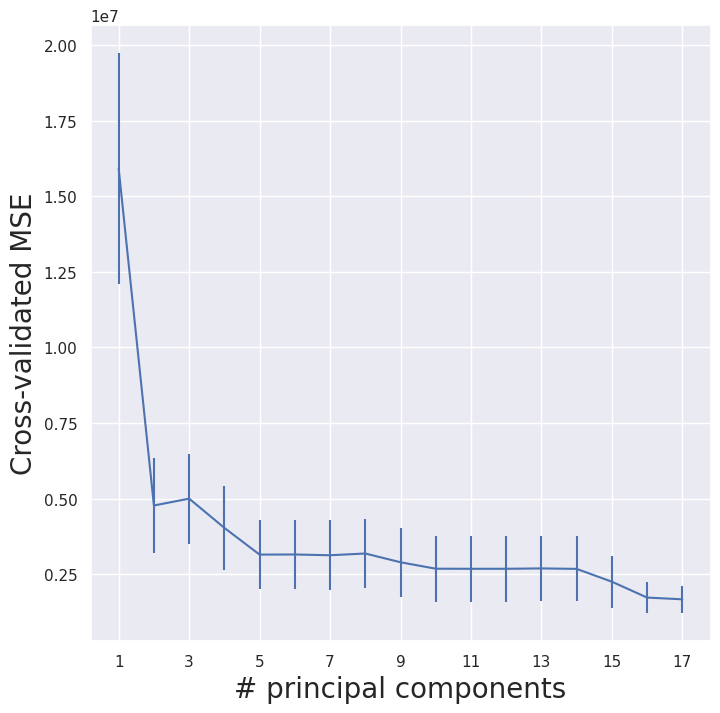

In [ ]:
K = 5
pcr_fig, ax = plt.subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])

In [ ]:
best_param_M = grid.best_params_["pca__n_components"]
print(best_param_M)

17


In [ ]:
pipe.named_steps["pca"].n_components = best_param_M
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=17)),
                ('linreg', LinearRegression())])

In [ ]:
y_hat = pipe.predict(X_test)
mse = np.mean((y_hat - y_test) ** 2)
print(f"MSE: {mse}")

MSE: 642753.8976533792


### f) PLS

In [ ]:
m = 2
pls = PLSRegression(scale=True)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)
mse = np.mean((y_hat - y_test) ** 2)
print(f"MSE: {mse}")


MSE: 1683162.9046732967


In [ ]:
param_grid = {"n_components": range(1, len(X_train.columns )+ 1)}
pls = PLSRegression(scale=True)
k = 5
kfold = skm.KFold(k,
                shuffle=True,
                random_state=2)
grid = skm.GridSearchCV(pls,
                        param_grid,
                        cv=kfold,
                        scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 18)},
             scoring='neg_mean_squared_error')

In [ ]:
type(grid.best_params_["n_components"])

int

In [ ]:
m = grid.best_params_["n_components"]

plss = PLSRegression(m,
                     scale=True)

plss.fit(X_train, y_train)

y_hat = plss.predict(X_test)

mse = np.mean((y_hat - y_test) ** 2)

print(f"MSE: {mse}")


MSE: 642728.9614907267


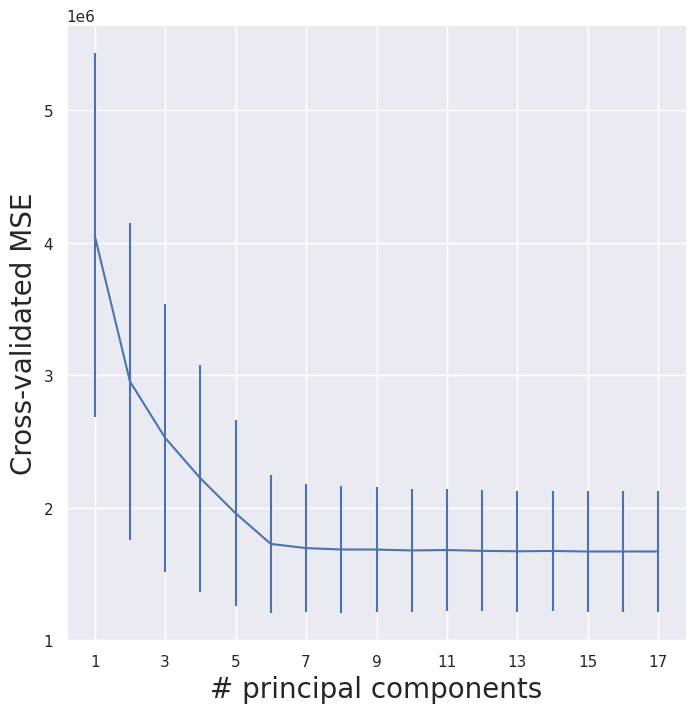

In [ ]:

pls_fig, ax = plt.subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
-grid.cv_results_['mean_test_score'],
grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])

Haciendo una compraracion con loo otros modelos podemos concluir que que el mejor fue el PLS, sin embargo la mejora no fue muy significativa con modelso como las regresion lineal o ridge que obtuvieron un MSE mayor por poco.

## 10


In [ ]:
# Generando la data:
n = 1000
p = 20
def correlation_ar1(p, rho=0.8):
  sigma = np.zeros((p,p))
  for i in range(p):
    for j in range(p):
      if i == j:
        sigma[i,j] = rho ** abs(i - j)
  return sigma

In [ ]:
rng = np.random.default_rng(2025)
sigma = correlation_ar1(p, 0.8)
X = rng.multivariate_normal(np.zeros(p), sigma, size=n)
eps = rng.normal(0, 7, size=n)

In [ ]:
# veamos los betas
B = np.array([2, 0, 0, 1, -2,
              -1, 0, 2, 0, 0,
              0, 0, 0, 0, 0,
              0, 3, 0, 4, 0])
y = np.dot(X, B) + eps
y.shape

(1000,)

### b)

In [ ]:
# vamos a splitear la data coin validation 10% para test
X_train, X_test, y_train, y_test = skm.train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        random_state=2025)


### c)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Datos simulados para que el ejemplo sea funcional (ignora esto si ya tienes datos)
# X_train, X_test, y_train, y_test = ...

# Inicialización
results = []
n_features = X_train.shape[1]

# Iteramos desde 0 hasta n_features (incluyendo el modelo completo)
# range va hasta n_features + 1
for k in range(n_features + 1):

    best_k_mse_test = np.inf
    best_k_model = None
    best_k_subset = None

    # --- CASO: Modelo Nulo (k=0) ---
    if k == 0:
        # El modelo nulo es simplemente predecir la media de y_train
        y_pred_null = np.full_like(y_test, y_train.mean())
        mse_test = mean_squared_error(y_test, y_pred_null)

        print(f"k={k} (Modelo Nulo) - MSE Test: {mse_test:.4f}")
        results.append({
            'k': 0,
            'features': [],
            'model': None, # O un objeto dummy si prefieres
            'mse_test': mse_test
        })
        continue

    # --- CASO: Subconjuntos (k > 0) ---
    # Aquí buscaremos el modelo con mejor ajuste en TRAINING (RSS más bajo)
    best_rss_train = np.inf
    best_model_internal = None
    best_subset_internal = None

    for subset in itertools.combinations(range(n_features), k):
        X_subset_train = X_train[:, subset]

        model = LinearRegression()
        model.fit(X_subset_train, y_train)

        # Calculamos error en TRAIN para elegir el "mejor representante" de tamaño k
        y_hat_train = model.predict(X_subset_train)
        rss_train = np.sum((y_train - y_hat_train) ** 2)

        if rss_train < best_rss_train:
            best_rss_train = rss_train
            best_model_internal = model
            best_subset_internal = subset

    # Una vez elegido el mejor modelo de tamaño k (basado en train), lo evaluamos en TEST
    X_subset_test = X_test[:, best_subset_internal]
    y_hat_test = best_model_internal.predict(X_subset_test)
    mse_test = mean_squared_error(y_test, y_hat_test)

    print(f"k={k} - Mejores feats: {best_subset_internal} - MSE Test: {mse_test:.4f}")

    results.append({
        'k': k,
        'features': best_subset_internal,
        'model': best_model_internal,
        'mse_test': mse_test
    })

# Al final, puedes ver cuál k tuvo el menor error en test
best_overall = min(results, key=lambda x: x['mse_test'])
print("\n--- MEJOR MODELO FINAL ---")
print(f"Tamaño: {best_overall['k']}, Features: {best_overall['features']}, MSE: {best_overall['mse_test']}")

k=0 (Modelo Nulo) - MSE Test: 57.1205
k=1 - Mejores feats: (18,) - MSE Test: 54.6794
k=2 - Mejores feats: (16, 18) - MSE Test: 52.9664
k=3 - Mejores feats: (0, 16, 18) - MSE Test: 54.5407
k=4 - Mejores feats: (0, 7, 16, 18) - MSE Test: 52.4946
k=5 - Mejores feats: (0, 4, 7, 16, 18) - MSE Test: 45.9616
k=6 - Mejores feats: (0, 4, 5, 7, 16, 18) - MSE Test: 45.7110
k=7 - Mejores feats: (0, 3, 4, 5, 7, 16, 18) - MSE Test: 42.1339
k=8 - Mejores feats: (0, 3, 4, 5, 7, 14, 16, 18) - MSE Test: 41.5884
k=9 - Mejores feats: (0, 3, 4, 5, 7, 11, 14, 16, 18) - MSE Test: 41.7927
k=10 - Mejores feats: (0, 3, 4, 5, 7, 11, 14, 16, 17, 18) - MSE Test: 41.8682
k=11 - Mejores feats: (0, 3, 4, 5, 7, 11, 13, 14, 16, 17, 18) - MSE Test: 42.5854
k=12 - Mejores feats: (0, 3, 4, 5, 7, 10, 11, 13, 14, 16, 17, 18) - MSE Test: 42.8617
k=13 - Mejores feats: (0, 3, 4, 5, 7, 10, 11, 13, 14, 15, 16, 17, 18) - MSE Test: 42.6643
k=14 - Mejores feats: (0, 3, 4, 5, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18) - MSE Test: 42.5111

In [ ]:
train_mse = []
model = LinearRegression()
for p in results[1:]:
  model.fit(X_train[:, p["features"]], y_train)
  y_hat = model.predict(X_train[:, p["features"]])
  train_mse.append(np.mean((y_train - y_hat) ** 2))
train_mse

[np.float64(70.97552049627949),
 np.float64(61.233017217484786),
 np.float64(55.2124450388386),
 np.float64(51.04108310674817),
 np.float64(47.74868861441457),
 np.float64(47.04243363026183),
 np.float64(46.63296281973103),
 np.float64(46.324940876680074),
 np.float64(46.20334132282388),
 np.float64(46.096579457074874),
 np.float64(45.98961882964596),
 np.float64(45.93923945591055),
 np.float64(45.890057860344484),
 np.float64(45.86341498976281),
 np.float64(45.84280133889432),
 np.float64(45.826505835368785),
 np.float64(45.81846648262972),
 np.float64(45.814654836720344),
 np.float64(45.81423104427066),
 np.float64(45.814191037683955)]

In [ ]:
print(results[0])

{'k': 0, 'features': [], 'model': None, 'mse_test': 57.12046285301984}


Text(0.5, 1.0, 'MSE vs K')

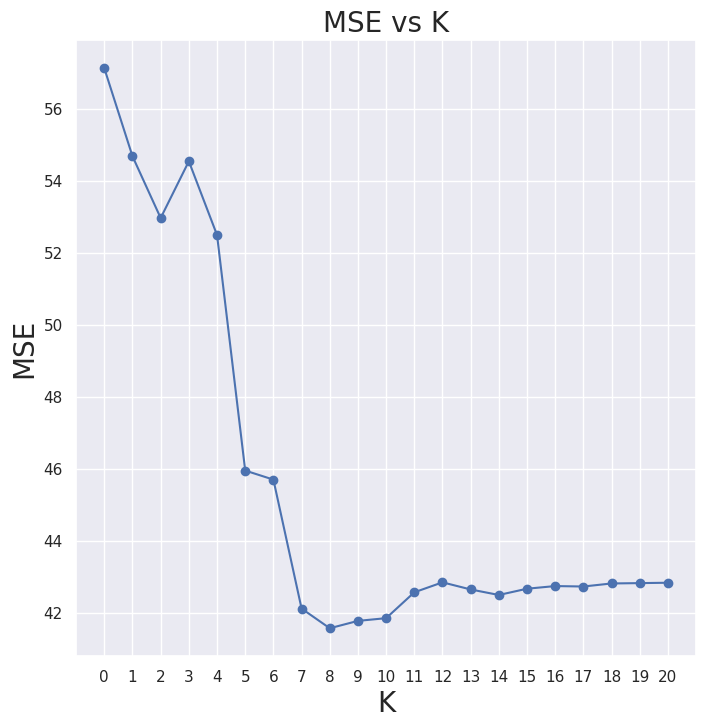

In [ ]:
fig_mse, ax = plt.subplots(figsize=(8,8))
mse_overall = [result["mse_test"] for result in results]
k_values = [result["k"] for result in results]
ax.plot(k_values, mse_overall, marker='o')
ax.set_xlabel('K', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)
ax.set_xticks(k_values) # <--- Agrega esto
ax.set_title('MSE vs K', fontsize=20)

## 11

In [4]:
df = load_data("Boston")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
df.chas.value_counts()

,count
chas,
0,471
1,35


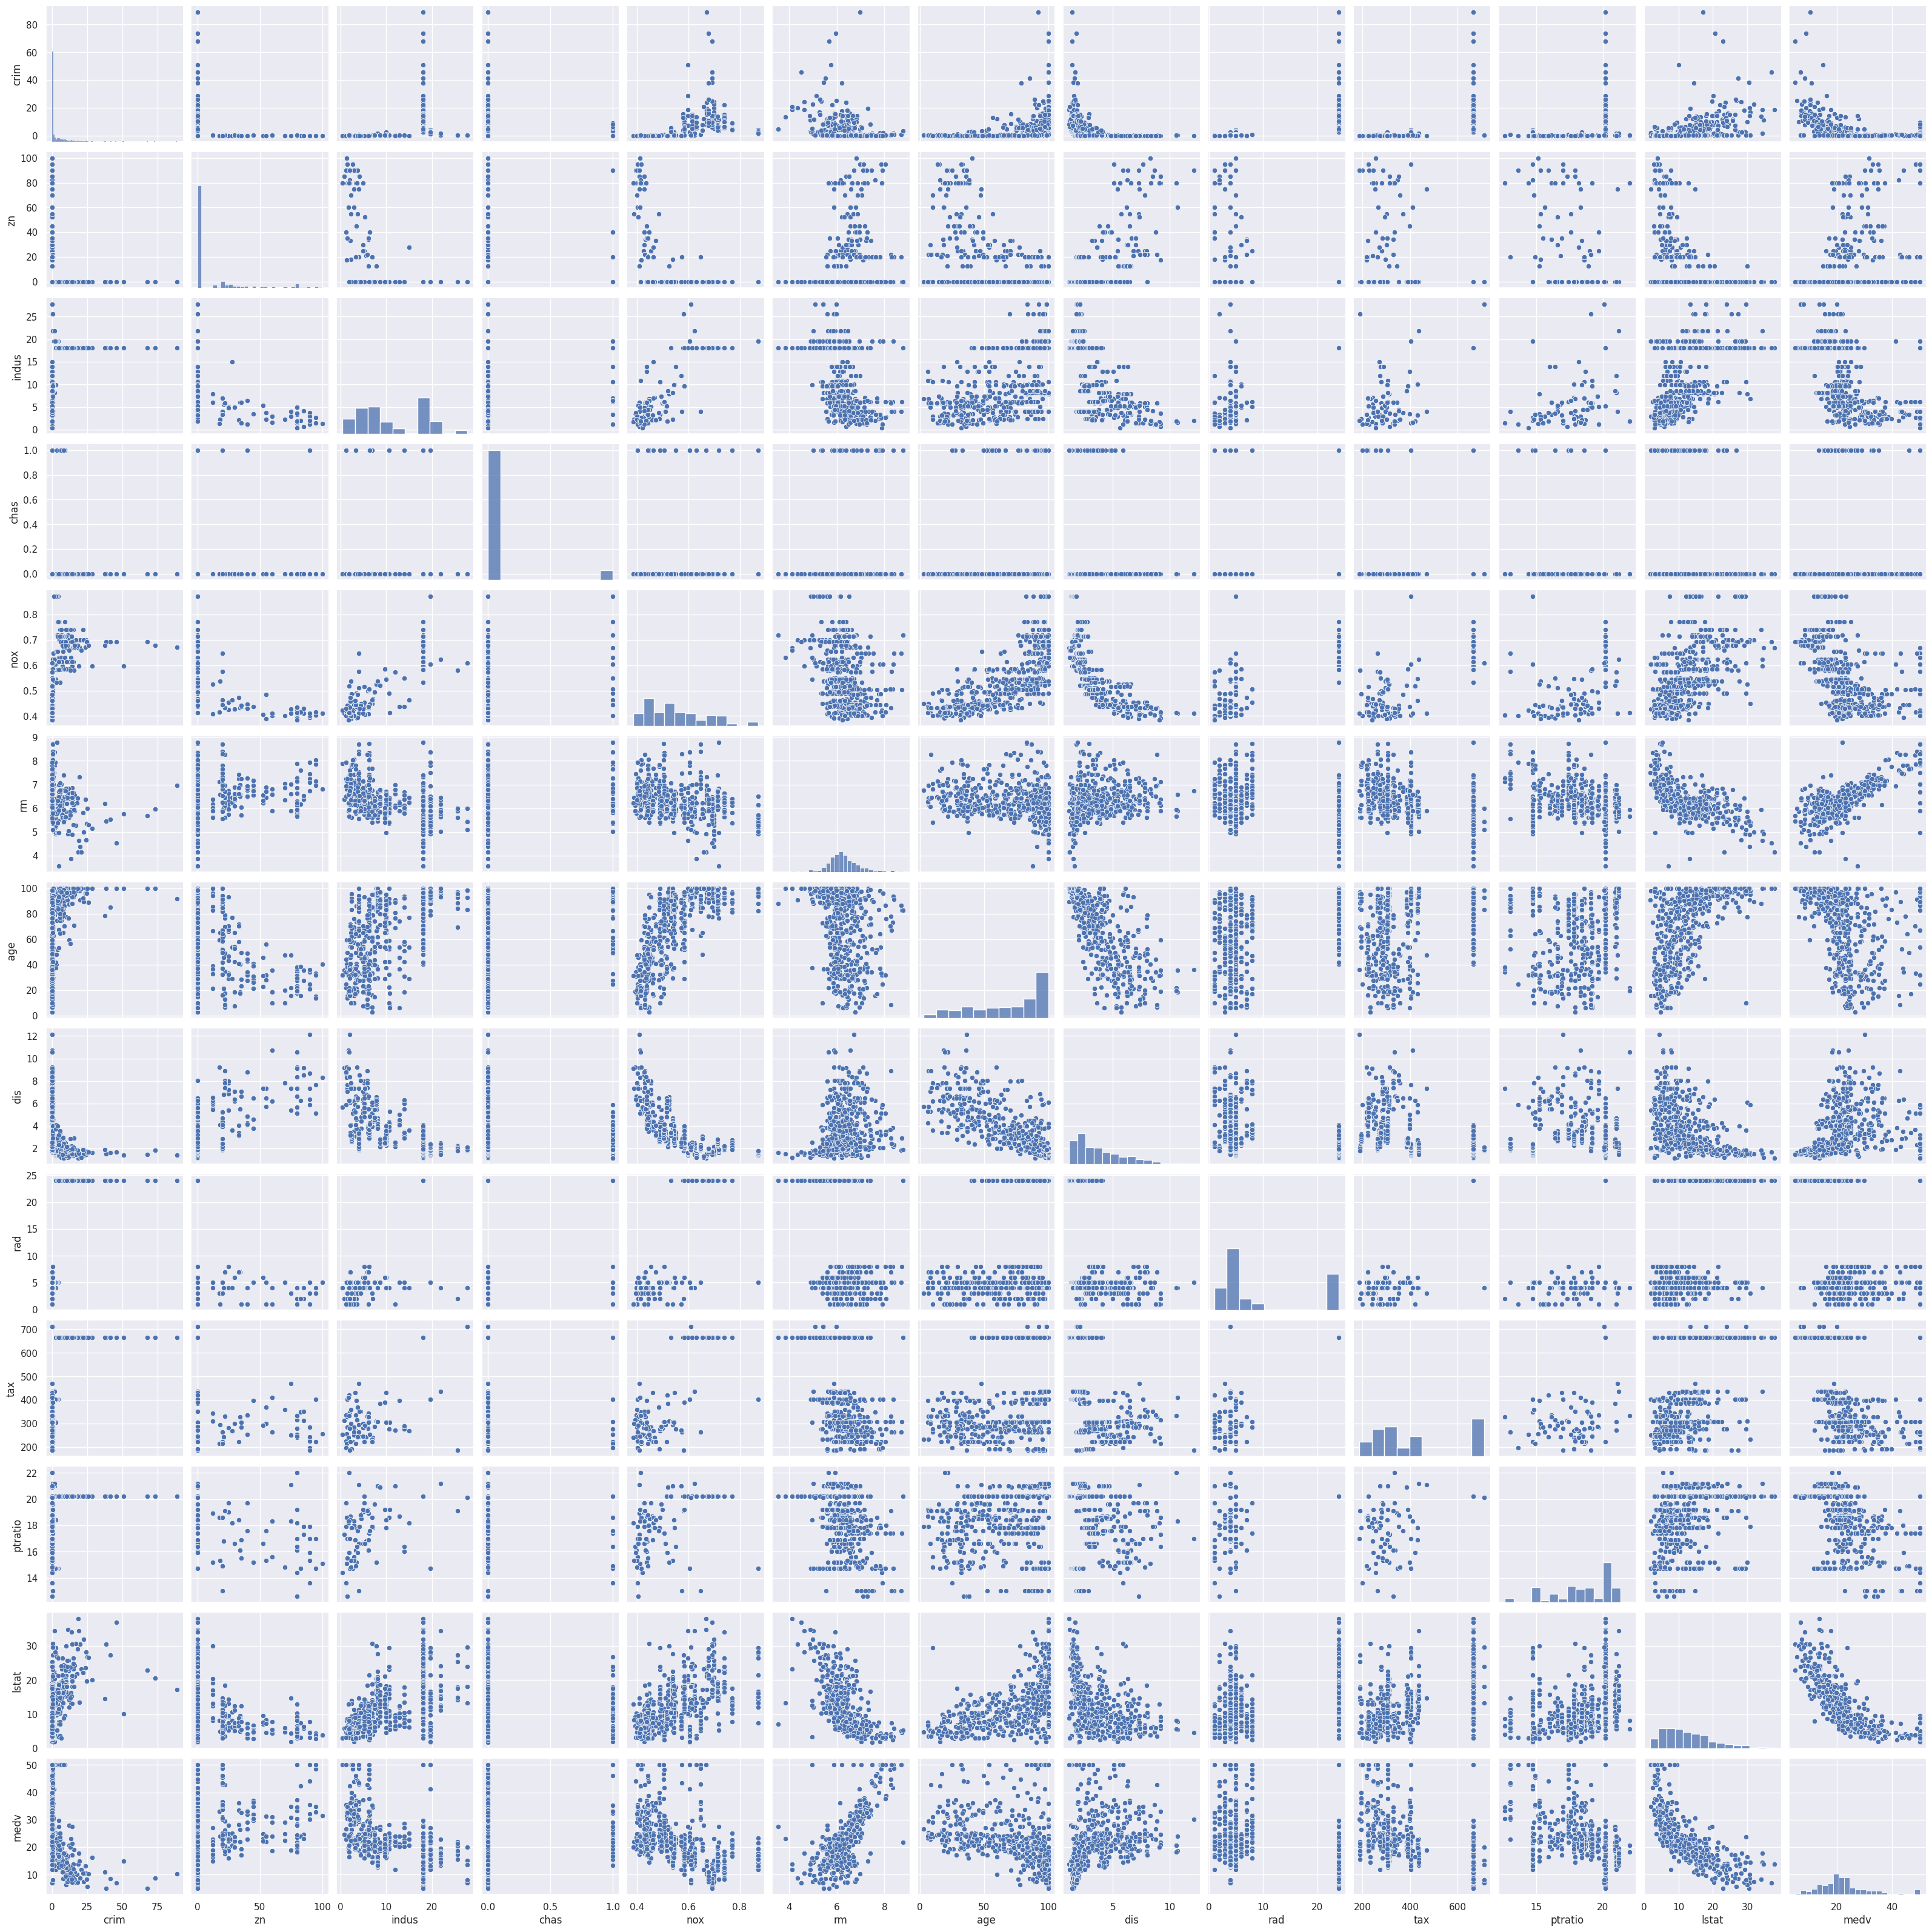

In [8]:
sns.pairplot(df)

In [9]:
corr_matrix = df.corr(numeric_only=True)

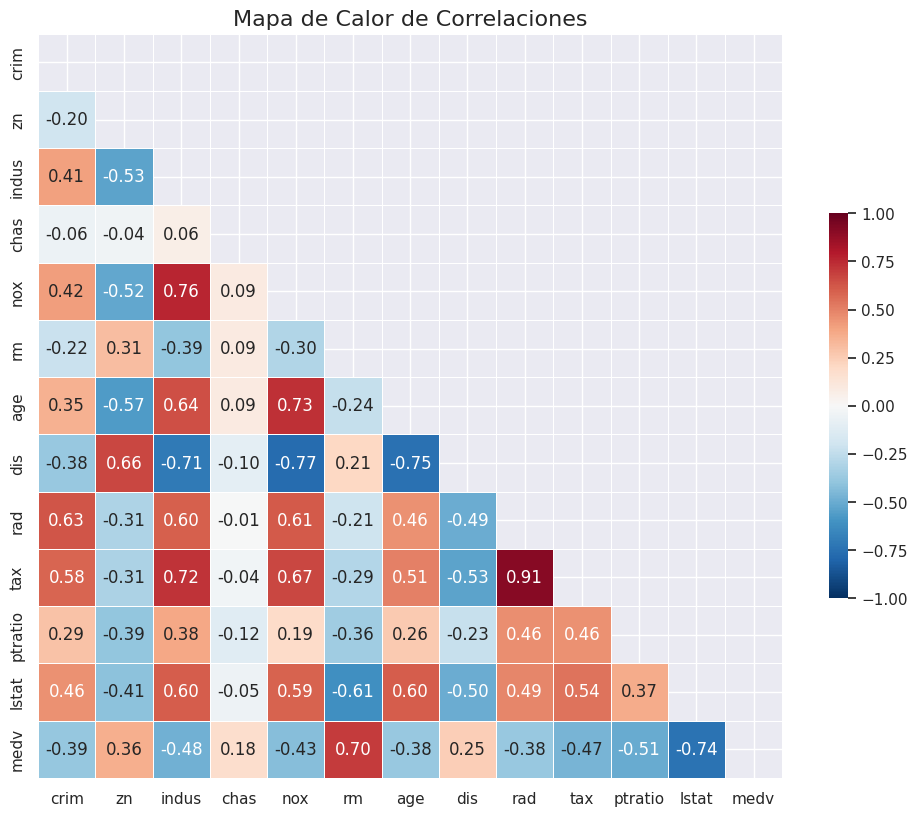

In [10]:
corr = df.corr(numeric_only=True)

# 2. Generar una máscara para ocultar el triángulo superior (opcional pero recomendado)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 3. Configurar el gráfico
plt.figure(figsize=(12, 10))

# 4. Dibujar el heatmap con máscara
sns.heatmap(corr,
            mask=mask,           # Oculta la parte superior
            cmap='RdBu_r',       # Mapa de color divergente (Rojo-Azul) ideal para correlaciones
            vmax=1,              # Valor máximo de la escala
            vmin=-1,             # Valor mínimo de la escala
            center=0,            # Centrar el blanco en 0
            square=True,         # Fuerza a que las celdas sean cuadradas
            linewidths=.5,       # Líneas blancas entre celdas
            cbar_kws={"shrink": .5}, # Barra de color más pequeña
            annot=True,          # Mostrar los números
            fmt=".2f")           # Formato a 2 decimales

plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.show()

In [11]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### a

#### forward strategy

In [13]:
design = MS(df.columns.drop("crim")).fit(df)

In [14]:
# vamos con un stepwise para identificar algunos de los mejores predictores

X = design.transform(df)
y = df["crim"]

strategy = Stepwise.fixed_steps(design,
                               len(design.terms),
                               direction="forward")

full_path = sklearn_selection_path(sm.OLS,
                                   strategy)
full_path.fit(X, y)
y_hat = full_path.predict(X)
print(y_hat.shape)

mse = np.mean((y.values[:, None] - y_hat) ** 2, axis=0)
mse

(506, 13)


array([73.84035967, 44.94982519, 42.76859413, 42.49571931, 42.21103708,
       42.05472955, 41.92769731, 41.32466375, 40.85245386, 40.73852797,
       40.70179223, 40.6612783 , 40.66109406])

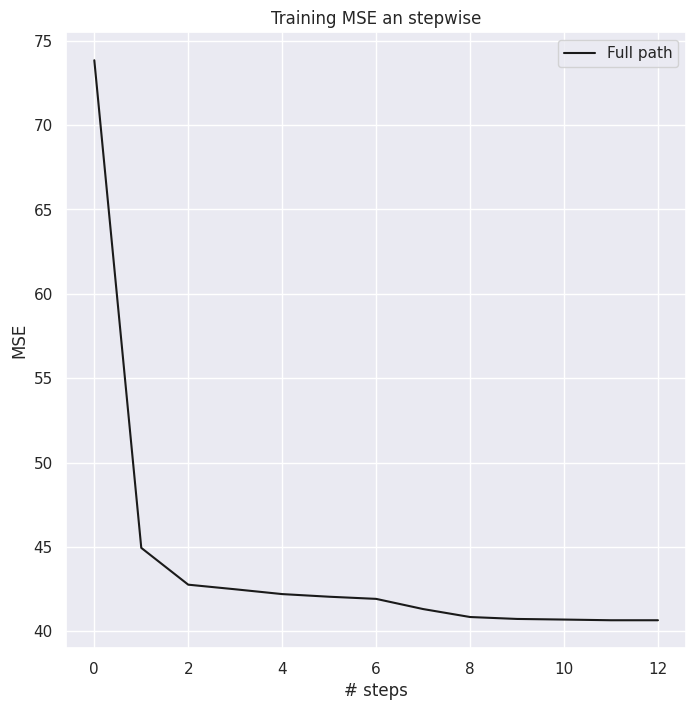

In [15]:
mse_full_path, ax = plt.subplots(figsize=(8,8))
n = len(design.terms) + 1
ax.plot(np.arange(n), mse,
        "k",
        label="Full path")
ax.set_title("Training MSE an stepwise")
ax.set_xlabel("# steps")
ax.set_ylabel("MSE")
ax.legend()

In [16]:
# ahora vamos a calcular el stepwise con una validacion en kfolds
k = 5
kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=2)
y_hat_forward_cv = skm.cross_val_predict(full_path,
                                X,
                                y,
                                cv=kfold)

In [17]:
# Ahora vamos a calcular los mse de cada fold, y los vamos a promediar
mse_fold = []
for train_idx, test_idx in kfold.split(y):
  mse_fold.append(np.mean((y.values[test_idx, None] - y_hat_forward_cv[test_idx])**2, axis=0))

In [18]:
cv_mse = np.array(mse_fold).T
cv_mse.shape

(13, 5)

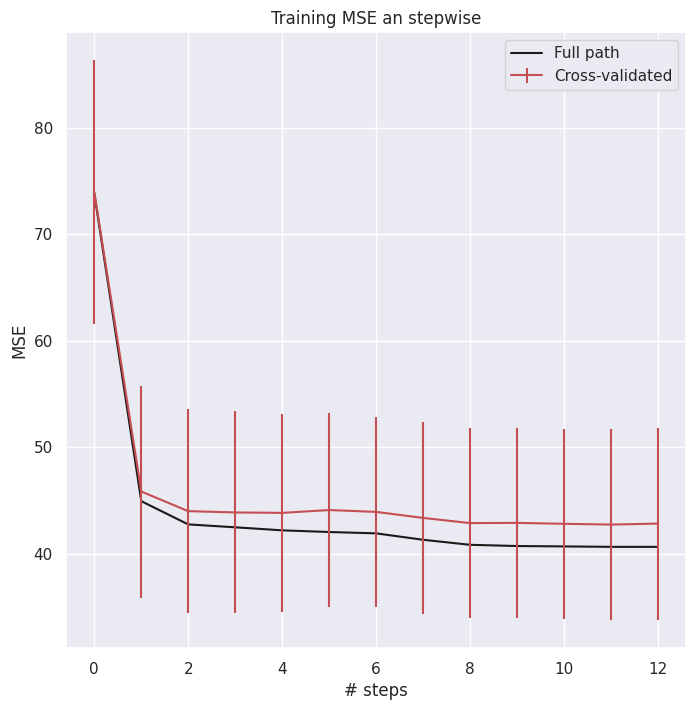

In [19]:
mse_full_path, ax = plt.subplots(figsize=(8,8))
n = len(design.terms) + 1
ax.plot(np.arange(n), mse,
        "k",
        label="Full path")
ax.set_title("Training MSE an stepwise")
ax.set_xlabel("# steps")
ax.set_ylabel("MSE")
ax.legend()
ax.errorbar(np.arange(n),
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(k),
            label='Cross-validated',
            c='r') # color red
ax.legend()
plt.show()

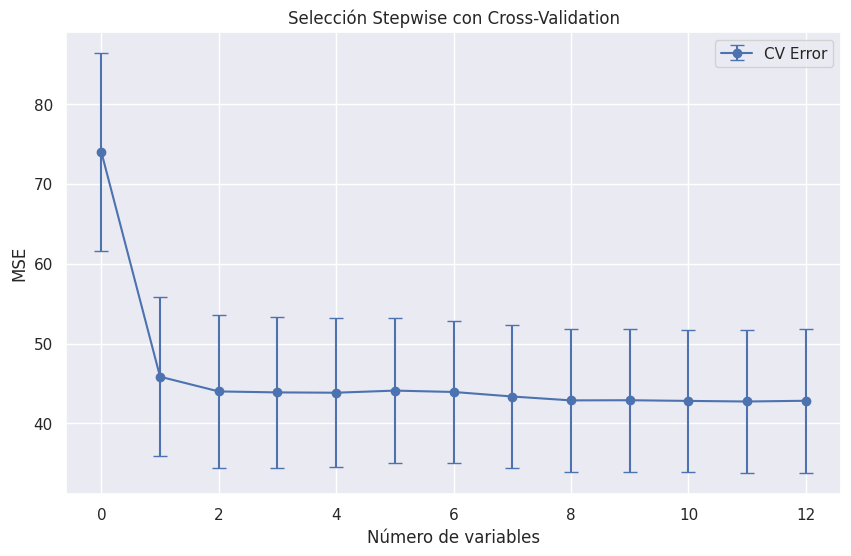

In [20]:
# Promedio de los 5 folds (eje Y principal)
mse_mean = cv_mse.mean(axis=1)
# Error estándar de los 5 folds (para las barras de error)
mse_se = cv_mse.std(axis=1) / np.sqrt(k)

n_steps = np.arange(len(mse_mean))

plt.figure(figsize=(10, 6))
plt.errorbar(n_steps, mse_mean, yerr=mse_se, fmt='-o', capsize=5, label='CV Error')
plt.xlabel('Número de variables')
plt.ylabel('MSE')
plt.title('Selección Stepwise con Cross-Validation')
plt.legend()
plt.show()

In [21]:
# ahora veamos el mejor modelo con esta estrategia.
print(len(cv_mse))
best_idx = np.argmin(np.mean(cv_mse, axis=1))
print(best_idx)


13
11


podemos ver que el modelo de 12 variables es el elegido por la stepwise search. vamos a identificarlo

In [22]:
final_strategy = Stepwise.first_peak(design,
                                     max_terms=int(best_idx) + 1,
                                      direction="forward")
selected_model_forward = sklearn_selected(sm.OLS,
                                  final_strategy)
selected_model_forward.fit(X, y)
selected_model_forward.selected_state_

('age',
 'chas',
 'dis',
 'indus',
 'lstat',
 'medv',
 'nox',
 'ptratio',
 'rad',
 'rm',
 'tax',
 'zn')

#### Backward strategy

In [23]:
X = design.transform(df)
y = df["crim"]

strategy = Stepwise.fixed_steps(design,
                                len(design.terms),
                                direction="backwards")

full_path = sklearn_selection_path(sm.OLS,
                                   strategy)
full_path.fit(X, y)
y_hat = full_path.predict(X)
y_hat.shape

(506, 13)

In [24]:
#ahora hagamos una CV search para ver el optimo
kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=2)

y_hat_backward_cv = skm.cross_val_predict(full_path,
                                X,
                                y,
                                cv=kfold)

In [25]:
y_hat_backward_cv.shape, y.shape

((506, 13), (506,))

In [26]:
# Veamos los resultados:
mse_fold = []
for train_idx, test_idx in kfold.split(y):
  mse_fold.append(np.mean((y.values[test_idx, None] - y_hat_backward_cv[test_idx]) ** 2 ,
                          axis=0))
cv_mse = np.array(mse_fold).T

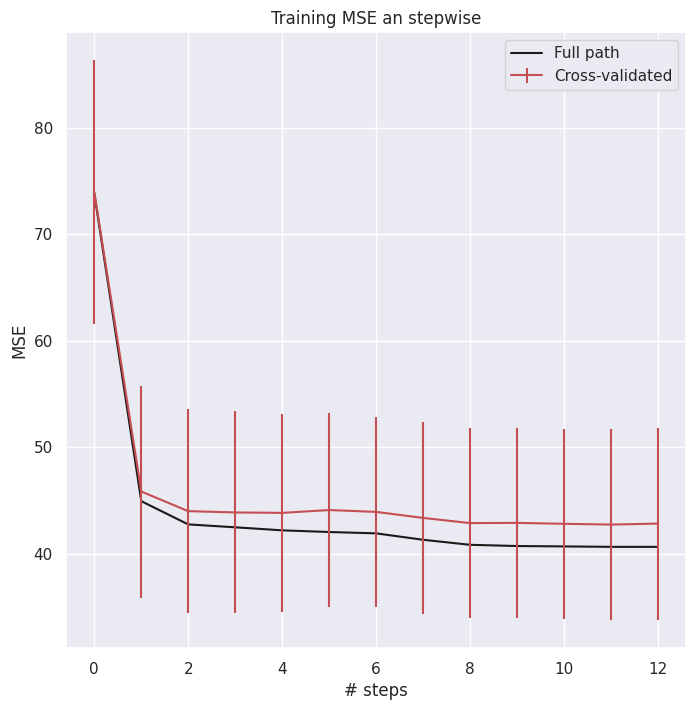

In [27]:
mse_full_path, ax = plt.subplots(figsize=(8,8))
n = len(design.terms) + 1
ax.plot(np.arange(n), mse,
        "k",
        label="Full path")
ax.set_title("Training MSE an stepwise")
ax.set_xlabel("# steps")
ax.set_ylabel("MSE")
ax.legend()
ax.errorbar(np.arange(n),
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(k),
            label='Cross-validated',
            c='r') # color red
ax.legend()
plt.show()

In [28]:
best_features = np.argmin(cv_mse.mean(axis=1))+ 1
print(int(best_features))

12


Vamos a hallar la configuracion de features que nos da el metodo backwards

In [29]:
final_strategy = Stepwise.first_peak(design,
                                     max_terms=int(best_features),
                                     direction="backwards")
selected_model_backwards = sklearn_selected(sm.OLS,
                                  final_strategy)
selected_model_backwards.fit(X, y)
selected_model_backwards.selected_state_

('age',
 'chas',
 'dis',
 'indus',
 'lstat',
 'medv',
 'nox',
 'ptratio',
 'rad',
 'rm',
 'tax',
 'zn')

Veamos los resultados de modelos y sus features para cada enfoque del stepwise search

In [30]:
selected_model_backwards.selected_state_ == selected_model_forward.selected_state_

True

Podemos ver que nos devuelve el mismo modelo mas optimo con 12 features

#### The Lasso

In [94]:
# vamos a buscar el valor de lambda en este contexto con el uso de un kfold con
# k de 5
k = 5
kfold = skm.KFold(k, shuffle=True, random_state=2)

X = design.transform(df)
X = X.drop("intercept", axis=1)
y = df['crim']

scaler = StandardScaler(with_mean=True, with_std=True)

lasso = skl.LassoCV(cv=kfold)

pipeline_lasso = Pipeline(steps=[("scaler", scaler),
                                 ("lasso", lasso)])

pipeline_lasso.fit(X, y)
tunned_lasso = pipeline_lasso.named_steps["lasso"]
tunned_lasso.alpha_



np.float64(0.05012735135755238)

In [95]:
# ahora indagemos un poco mas en el path de este metodo.
Xs = scaler.fit_transform(X)
lambdas, soln_path = skl.Lasso.path(Xs,
                                    y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]

soln_path.shape

(12, 100)

In [96]:

soln_path = pd.DataFrame(soln_path.T,
                         columns=X.columns,
                         index=lambdas)
soln_path.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
5.374992,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.000000,0.0,0.0,0.0,-0.0
5.012735,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.362256,0.0,0.0,0.0,-0.0
4.674894,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.700098,0.0,0.0,0.0,-0.0
4.359821,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.015170,0.0,0.0,0.0,-0.0
4.065984,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.309008,0.0,0.0,0.0,-0.0


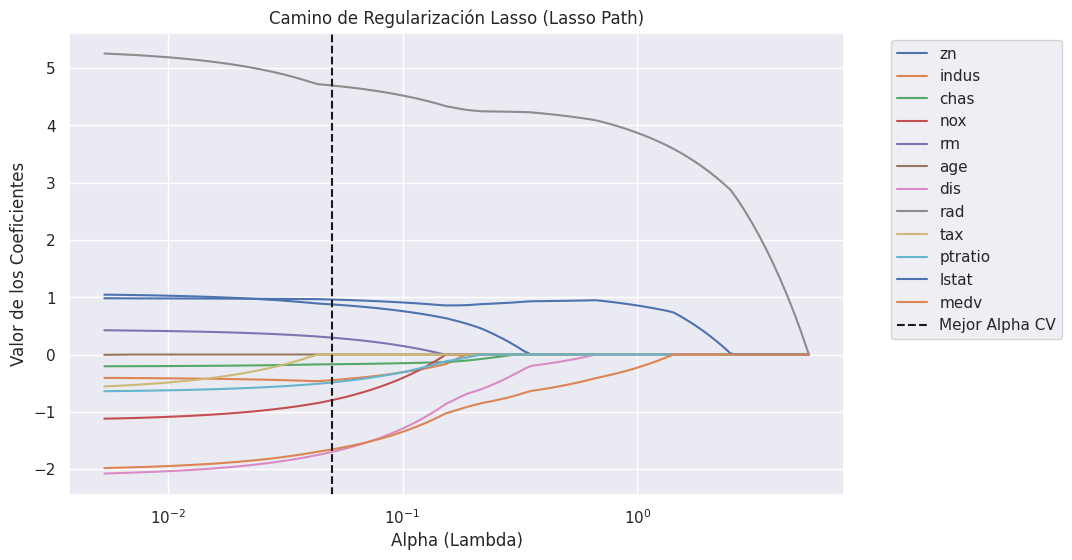

In [97]:
# Graficamos el camino
# Ponemos el eje X en escala logarítmica porque los alphas varían en potencias
soln_path.plot(logx=True, figsize=(10, 6))

# Agregamos una línea vertical donde LassoCV encontró el mejor alpha
# Nota: Ponemos el signo menos (-) porque logx invierte el eje visualmente a veces,
# pero mejor usamos la escala directa del plot.
plt.axvline(tunned_lasso.alpha_, linestyle='--', color='k', label='Mejor Alpha CV')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('Valor de los Coeficientes')
plt.title('Camino de Regularización Lasso (Lasso Path)')
plt.grid(True)
plt.show()

In [77]:
# ahora veamos la busqueda con un outer shuffle
outer = skm.ShuffleSplit(n_splits=10,
                         test_size=0.2,
                         random_state=2)

inner = skm.KFold(n_splits=5,
                  shuffle=True,
                  random_state=2)

lambdas = 10 ** np.linspace(8, -2, 100) / y.std()

scaler = StandardScaler()

lassoCV = skl.LassoCV(alphas=lambdas,
                      cv=inner)
pipe_lasso = Pipeline(steps=[("scaler", scaler),
                             ("lasso", lassoCV)])
results = skm.cross_validate(pipe_lasso,
                             X,
                             y,
                             cv=outer,
                             scoring="neg_mean_squared_error",
                             return_estimator=True)
-results["test_score"]

array([28.48828455, 23.15205621, 63.12747272, 16.99578261, 37.35934636,
       15.09250213, 12.00273733, 57.32065793, 53.44830414, 62.8709587 ])

In [78]:
# Extraer los alphas (lambdas) de cada iteración del outer loop
scores = -results["test_score"]
best_alphas = [modelo['lasso'].alpha_ for modelo in results['estimator']]

best_coeff =  [modelo['lasso'].coef_ for modelo in results['estimator']]
best_coeff = np.array(best_coeff)
best_coeff = pd.DataFrame(best_coeff, columns=X.columns, index=best_alphas)
best_coeff["mse"] = scores
best_coeff.sort_values("mse", ascending=True)
#
#

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,mse
0.023909,1.063275,-0.359535,-0.193798,-1.328849,0.505301,-0.111524,-2.133395,5.306680,-0.286936,-0.742400,1.037742,-2.278569,12.002737
0.060617,0.888992,-0.585919,-0.235166,-0.727468,0.241567,-0.000000,-1.706317,4.668347,-0.000000,-0.397037,1.129362,-1.523118,15.092502
0.018947,0.957948,-0.250885,-0.250615,-1.210711,0.523109,0.000000,-2.028613,5.237790,-0.525305,-0.701193,1.049673,-2.084208,16.995783
0.030169,1.085037,-0.352622,-0.258245,-1.016467,0.583918,0.071309,-2.113828,5.230586,-0.447410,-0.623890,0.631694,-2.276565,23.152056
0.005922,0.891624,-0.540230,-0.094472,-0.771017,0.700992,-0.138532,-1.912769,5.019967,-0.589476,-0.587334,1.124571,-1.974335,28.488285
0.060617,0.922156,-0.372293,-0.018155,-0.624239,0.491018,-0.000000,-1.643012,4.586491,-0.000000,-0.412180,1.010173,-1.711808,37.359346
0.060617,0.755050,-0.205115,-0.226743,-0.767205,0.406332,-0.000000,-1.532987,4.653571,-0.000000,-0.444616,0.599163,-1.633194,53.448304
0.076490,0.835145,-0.361833,-0.105426,-0.446325,0.195804,-0.000000,-1.428421,4.379855,-0.000000,-0.274389,0.785402,-1.364383,57.320658
0.030169,0.922607,-0.407280,-0.211684,-1.175404,0.000000,0.000000,-1.848503,4.977688,-0.148503,-0.617911,1.254197,-1.479555,62.870959
0.048038,0.928823,-0.546265,-0.021538,-0.297068,0.482887,-0.208017,-1.678281,4.456513,-0.000000,-0.349885,1.135141,-1.577160,63.127473


In [79]:
scores = -results["test_score"]
best_alphas = [modelo['lasso'].alpha_ for modelo in results['estimator']]
coefs = [modelo['lasso'].coef_ for modelo in results['estimator']]
intercepts = [modelo['lasso'].intercept_ for modelo in results['estimator']]

df_resultados = pd.DataFrame(coefs, columns=X.columns)

df_resultados['intercepto'] = intercepts
df_resultados['alpha_optimo'] = best_alphas
df_resultados['mse_test'] = scores

df_resultados.sort_values("mse_test", ascending=True, inplace=True)
df_resultados

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,intercepto,alpha_optimo,mse_test
6,1.063275,-0.359535,-0.193798,-1.328849,0.505301,-0.111524,-2.133395,5.306680,-0.286936,-0.742400,1.037742,-2.278569,3.830696,0.023909,12.002737
5,0.888992,-0.585919,-0.235166,-0.727468,0.241567,-0.000000,-1.706317,4.668347,-0.000000,-0.397037,1.129362,-1.523118,3.708429,0.060617,15.092502
3,0.957948,-0.250885,-0.250615,-1.210711,0.523109,0.000000,-2.028613,5.237790,-0.525305,-0.701193,1.049673,-2.084208,3.687974,0.018947,16.995783
1,1.085037,-0.352622,-0.258245,-1.016467,0.583918,0.071309,-2.113828,5.230586,-0.447410,-0.623890,0.631694,-2.276565,3.706152,0.030169,23.152056
0,0.891624,-0.540230,-0.094472,-0.771017,0.700992,-0.138532,-1.912769,5.019967,-0.589476,-0.587334,1.124571,-1.974335,3.440778,0.005922,28.488285
4,0.922156,-0.372293,-0.018155,-0.624239,0.491018,-0.000000,-1.643012,4.586491,-0.000000,-0.412180,1.010173,-1.711808,3.492846,0.060617,37.359346
8,0.755050,-0.205115,-0.226743,-0.767205,0.406332,-0.000000,-1.532987,4.653571,-0.000000,-0.444616,0.599163,-1.633194,3.557394,0.060617,53.448304
7,0.835145,-0.361833,-0.105426,-0.446325,0.195804,-0.000000,-1.428421,4.379855,-0.000000,-0.274389,0.785402,-1.364383,3.393293,0.076490,57.320658
9,0.922607,-0.407280,-0.211684,-1.175404,0.000000,0.000000,-1.848503,4.977688,-0.148503,-0.617911,1.254197,-1.479555,3.718015,0.030169,62.870959
2,0.928823,-0.546265,-0.021538,-0.297068,0.482887,-0.208017,-1.678281,4.456513,-0.000000,-0.349885,1.135141,-1.577160,3.564623,0.048038,63.127473


podemos apreciar que hay coeficientes que son elimados con valores iguales a 0 tambien tenemso en cuienta que el valor de lambda mas optimo para el fold 1 fue de 0.2112


#### ridge

In [98]:
# vamos a buscar el valor de lambda mejor para ridge con el sikguiente setteo
scaler = StandardScaler()
outer_val = skm.ShuffleSplit(n_splits=10,
                             test_size=0.2,
                             random_state=2)
k = 5
inner_val = skm.KFold(n_splits=5,
                      shuffle=True,
                      random_state=2)
lambdas = 10 ** np.linspace(8, -2, 100) / y.std()
ridge = skl.RidgeCV(alphas=lambdas,
                    cv=inner_val)

pipeline = Pipeline(steps=[("scaler", scaler),
                          ("ridge", ridge)])

results = skm.cross_validate(pipeline,
                             X,
                             y,
                             cv=outer_val,
                             scoring="neg_mean_squared_error",
                             return_estimator=True)
-results["test_score"]

array([30.41751654, 22.69240959, 64.16554711, 16.91531265, 37.95642316,
       15.48660016, 11.26544348, 60.55699755, 53.89445404, 63.05394276])

In [99]:
scores = -results["test_score"]
best_alphas = [modelo['ridge'].alpha_ for modelo in results['estimator']]
coefs = [modelo['ridge'].coef_ for modelo in results['estimator']]
intercepts = [modelo['ridge'].intercept_ for modelo in results['estimator']]

df_resultados = pd.DataFrame(coefs, columns=X.columns)

df_resultados['intercepto'] = intercepts
df_resultados['alpha_optimo'] = best_alphas
df_resultados['mse_test'] = scores

df_resultados.sort_values("mse_test", ascending=True, inplace=True)
df_resultados

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,intercepto,alpha_optimo,mse_test
6,0.841443,-0.477176,-0.211778,-0.782914,0.475611,-0.140618,-1.669637,4.011007,0.748073,-0.449816,1.197680,-1.783635,3.830696,25.636449,11.265443
5,0.727149,-0.610524,-0.270455,-0.400783,0.291707,0.033027,-1.386340,3.516557,0.820193,-0.215042,1.244755,-1.257400,3.708429,40.820477,15.486600
3,0.913142,-0.351704,-0.262612,-1.072446,0.546258,0.009038,-1.928152,4.784257,-0.131290,-0.622055,1.132483,-1.963989,3.687974,8.013226,16.915313
1,0.737366,-0.471038,-0.309670,-0.382684,0.522282,0.150590,-1.352881,3.630109,0.808217,-0.276638,0.932559,-1.534881,3.706152,40.820477,22.692410
0,0.537402,-0.447728,-0.122133,0.005763,0.484290,-0.012979,-0.989766,2.967371,0.929752,-0.107970,1.126724,-1.154679,3.440778,64.997743,30.417517
4,0.676030,-0.342228,-0.110491,-0.133022,0.418310,0.087137,-1.106547,3.029057,1.058742,-0.086483,1.087313,-1.155451,3.492846,64.997743,37.956423
8,0.632516,-0.310228,-0.262091,-0.399902,0.444778,0.001098,-1.242837,3.488758,0.833441,-0.226692,0.813639,-1.311845,3.557394,40.820477,53.894454
7,0.494165,-0.158124,-0.194715,0.089771,0.165544,0.132121,-0.753949,2.385296,1.132338,0.084801,0.877656,-0.777921,3.393293,130.595610,60.556998
9,0.856649,-0.490554,-0.239064,-0.940416,0.014556,0.072119,-1.655957,4.258305,0.403070,-0.492647,1.315035,-1.314906,3.718015,16.100437,63.053943
2,0.749934,-0.548773,-0.067185,-0.117326,0.505642,-0.218044,-1.414810,3.366243,0.894471,-0.232858,1.258452,-1.306589,3.564623,32.349530,64.165547


Podemos ver que hay casos como tax y rad en donde tax tiene una particion muy reducida tambien tenemos el caso de age el cual no es muy util para el modelo.

#### PCR

In [105]:
k = 5

kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=2)

pca = PCA(n_components=2)

linreg = skl.LinearRegression()

scaler = StandardScaler()

pipe = Pipeline(steps=[("scaler", scaler),
                      ("pca", pca),
                      ("linreg", linreg)])
#vamos a hacer un grid search.
param_grid = {"pca__n_components": range(1, len(X.columns)+ 1)}

grid_search = skm.GridSearchCV(pipe,
                               param_grid,
                               cv=kfold,
                               scoring="neg_mean_squared_error")
grid_search.fit(X, y)
grid_search.best_params_

{'pca__n_components': 12}

12

In [101]:
X.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#### linear regression

In [80]:
design = MS(df.columns.drop("crim")).fit(df)

X = design.transform(df)
y = df["crim"]

In [90]:
# vamos con un CV fold de 5
k = 5
kfold = skm.KFold(k,
                  shuffle=True,
                  random_state=3)

linear_model = skl.LinearRegression()
results = skm.cross_validate(linear_model,
                             X,
                             y,
                             cv=kfold,
                             scoring="neg_mean_squared_error")
-results["test_score"]



array([ 17.34673019,  22.55360887,  18.08138107,  44.33173827,
       113.38599188])